* Let's analyze the HR Analytics dataset by performing EDA & find out useful insights & information which would help us to predict that which all employees   might be searching for a new job.

* Later, Let's Train different models & compare their metrics.

In [1]:
# Importing the required libraries


import numpy as np # linear algebra
import pandas as pd # data processing


#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from datetime import datetime
from scipy.stats import skew
import time
import copy
import math

from sklearn.feature_selection import SelectKBest,chi2,f_classif,mutual_info_classif  # Feature Engineering
from sklearn.model_selection import train_test_split                                  # Splitting the dataset into training & testing
from imblearn.over_sampling import SMOTE                                              # For Handling Data Imbalance
from sklearn.preprocessing import OrdinalEncoder                                      # Label Encoding library 
from sklearn.utils import resample                                                    # Data Resampling Library


# Regression & Classification Models
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV


#from tune_sklearn import TuneSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Model Metric libraries
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [2]:
# Importing the dataset

df_train=pd.read_csv("../input/hr-analytics-job-change-of-data-scientists/aug_train.csv")
df_test=pd.read_csv("../input/hr-analytics-job-change-of-data-scientists/aug_test.csv")

In [3]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
print("Training Dataset Info:-")
print("\n")
print(df_train.info())

Training Dataset Info:-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2

In [5]:
#Checking for missing data

print("Missing Data in the Training Dataset:-")
print("\n")
print(df_train.isnull().sum())

print("\n")

#Checking for missing data (In Percentage(%))

print("Missing Data in the Training Dataset (In %):-")
print("\n")
print((df_train.isnull().sum()/len(df_train))*100)

Missing Data in the Training Dataset:-


enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


Missing Data in the Training Dataset (In %):-


enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.0

* **As there are missing values present in both Train & Test datasets, we need to replace the missing values with more suitable & efficient values.**
* **If we replace missing values with mean or median, it affects the data distribution & may affect the Model performance during model building.**
* **So, it's best to use "ffill" & "bfill" methods as the data will be distributed evenly without affecting the distribution.**

In [6]:
# Let's drop the Missing values.

missing_value_fields=['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type',
                      'last_new_job']

df_train=df_train.dropna()

print("Training Dataset:-")

print("\n")
print(df_train.isnull().sum())

Training Dataset:-


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


# Data Visualization & EDA

**Let's analyze the relationship of each feature with the target variable with the help of crosstab to gain insights.**

In [7]:
#Gender

df_train.gender.value_counts()

Male      8073
Female     804
Other       78
Name: gender, dtype: int64

target   0.0   1.0  Job Changers' Percentage (%)
gender                                          
Male    6733  1340                         16.60
Female   673   131                         16.29
Other     66    12                         15.38


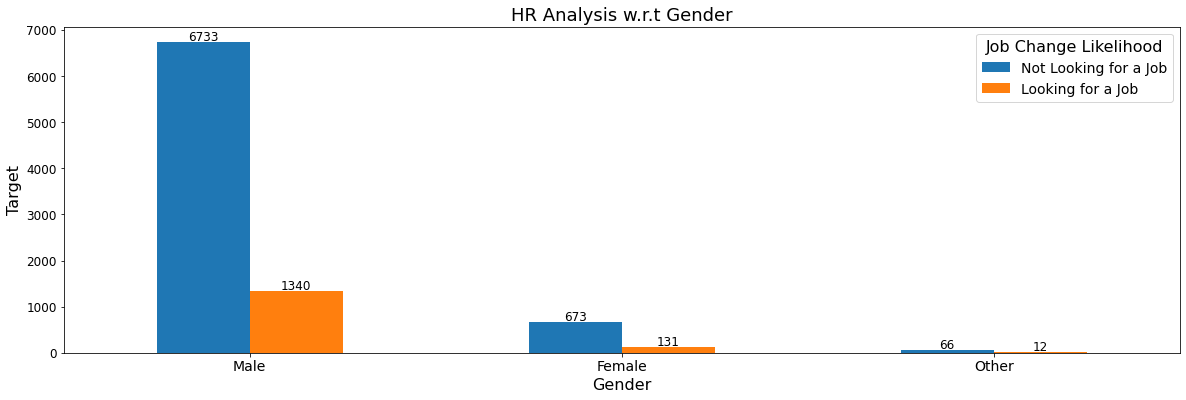

In [8]:
# Dependancy of Gender on Target Variable

Gender_crosstab=pd.crosstab(index=df_train['gender'],columns=df_train['target']).sort_values(by=1.0,ascending=False)
Gender_crosstab["Job Changers' Percentage (%)"]=round(Gender_crosstab[1]/(Gender_crosstab[0]+Gender_crosstab[1])*100,2)
print(Gender_crosstab)


# Let's plot the result and visualize.

g=Gender_crosstab.drop(["Job Changers' Percentage (%)"], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   fontsize=12,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Gender',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('HR Analysis w.r.t Gender',fontsize=18)
plt.legend(['Not Looking for a Job','Looking for a Job'],title='Job Change Likelihood',title_fontsize=16,prop={"size":14})

* Most of the job searchers are in the male category followed by the females and others.

In [9]:
#Revlevant Experience

df_train.relevent_experience.value_counts()

Has relevent experience    7851
No relevent experience     1104
Name: relevent_experience, dtype: int64

In [10]:
# Dependancy of Relevant Experience on Target Variable

Relevant_Exp_crosstab=pd.crosstab(index=df_train['relevent_experience'],columns=df_train['target']).sort_values(by=1.0,ascending=False)
Relevant_Exp_crosstab["Job Changers' Percentage (%)"]=round(Relevant_Exp_crosstab[1]/(Relevant_Exp_crosstab[0]+
                                                                                      Relevant_Exp_crosstab[1])*100,2)
Relevant_Exp_crosstab

target,0.0,1.0,Job Changers' Percentage (%)
relevent_experience,,,
Has relevent experience,6591,1260,16.05
No relevent experience,881,223,20.20


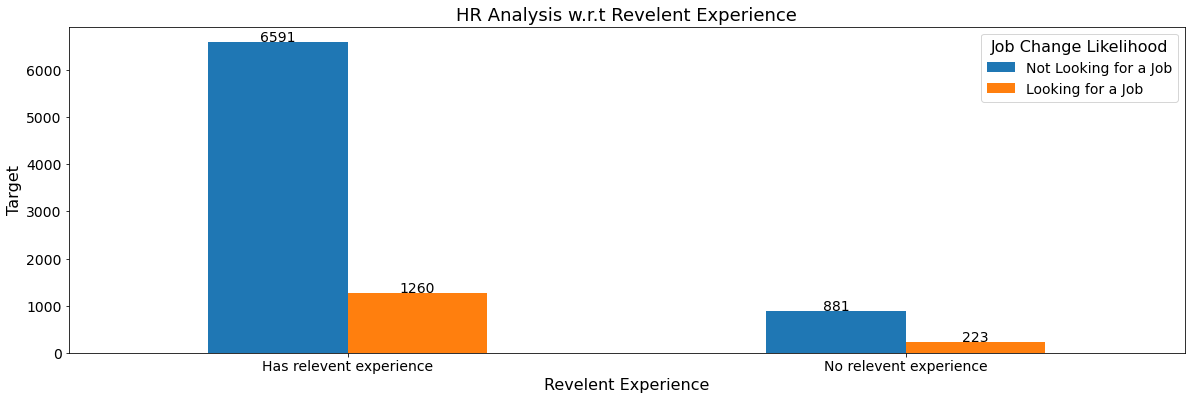

In [11]:
# Let's plot the result and visualize.

g=Relevant_Exp_crosstab.drop(["Job Changers' Percentage (%)"], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   fontsize=14,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Revelent Experience',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('HR Analysis w.r.t Revelent Experience',fontsize=18)
plt.legend(['Not Looking for a Job','Looking for a Job'],title='Job Change Likelihood',title_fontsize=16,prop={"size":14})

* Most of the Job Changers are having relevent experience.

In [12]:
#Enrolled University

df_train.enrolled_university.value_counts()

no_enrollment       7594
Full time course     832
Part time course     529
Name: enrolled_university, dtype: int64

In [13]:
# Dependancy of Enrolled University on Target Variable

University_crosstab=pd.crosstab(index=df_train['enrolled_university'],columns=df_train['target']).sort_values(by=1.0,ascending=False)
University_crosstab["Job Changers' Percentage (%)"]=round(University_crosstab[1]/(University_crosstab[0]+University_crosstab[1])*100,2)
University_crosstab

target,0.0,1.0,Job Changers' Percentage (%)
enrolled_university,,,
no_enrollment,6425,1169,15.39
Full time course,600,232,27.88
Part time course,447,82,15.50


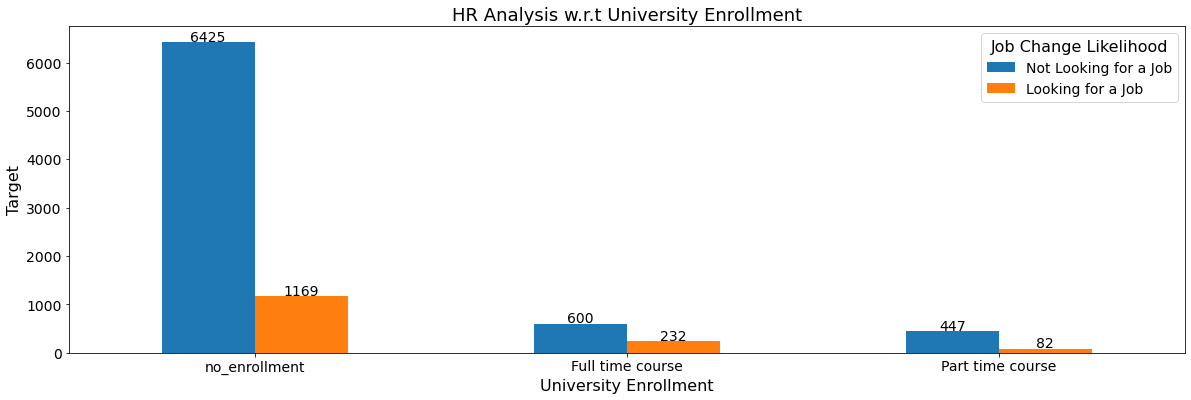

In [14]:
# Let's plot the result and visualize.

g=University_crosstab.drop(["Job Changers' Percentage (%)"], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   fontsize=14,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('University Enrollment',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('HR Analysis w.r.t University Enrollment',fontsize=18)
plt.legend(['Not Looking for a Job','Looking for a Job'],title='Job Change Likelihood',title_fontsize=16,prop={"size":14})

* Most of the Job Changers have not enrolled in a University!.

In [15]:
# Education Level

df_train.education_level.value_counts()

Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64

target            0.0   1.0  Job Changers' Percentage (%)
education_level                                          
Graduate         5160  1092                         17.47
Masters          2092   357                         14.58
Phd               220    34                         13.39


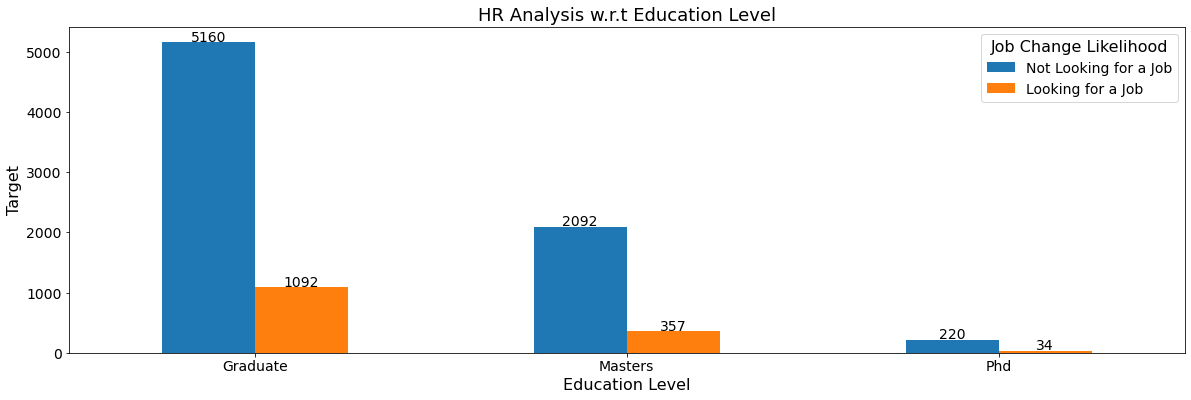

In [16]:
# Dependancy of Education on Target Variable

Education_crosstab=pd.crosstab(index=df_train['education_level'],columns=df_train['target']).sort_values(by=1.0,ascending=False)
Education_crosstab["Job Changers' Percentage (%)"]=round(Education_crosstab[1]/(Education_crosstab[0]+Education_crosstab[1])*100,2)
print(Education_crosstab)


# Let's plot the result and visualize.

g=Education_crosstab.drop(["Job Changers' Percentage (%)"], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   fontsize=14,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Education Level',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('HR Analysis w.r.t Education Level',fontsize=18)
plt.legend(['Not Looking for a Job','Looking for a Job'],title='Job Change Likelihood',title_fontsize=16,prop={"size":14})

* Most of them trying to search for new Jobs are college graduates and the employees having a primary school level of education are the least Job changers.

In [17]:
# Major Discipline

df_train.major_discipline.value_counts()

STEM               7989
Humanities          378
Other               177
Business Degree     170
Arts                129
No Major            112
Name: major_discipline, dtype: int64

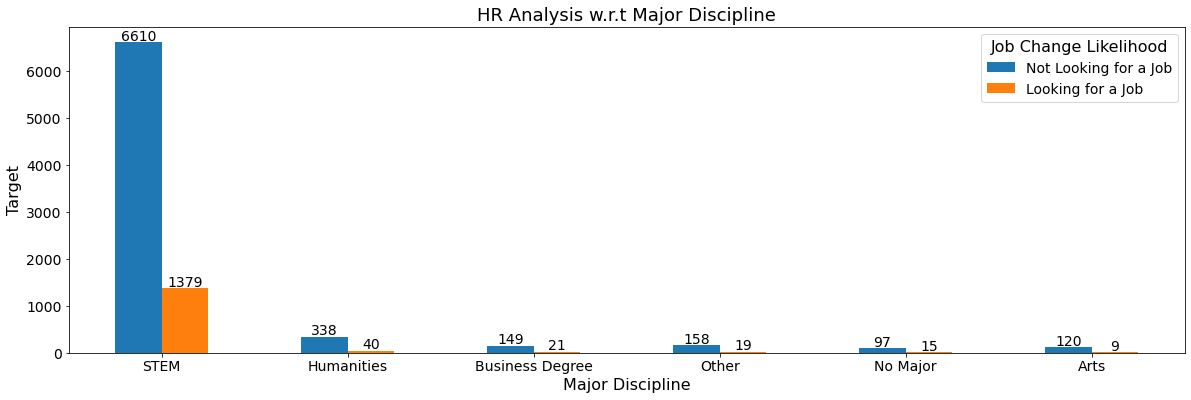

In [18]:
# Dependancy of Major Discipline on Target Variable

Major_crosstab=pd.crosstab(index=df_train['major_discipline'],columns=df_train['target']).sort_values(by=1.0,ascending=False)
Major_crosstab["Job Changers' Percentage (%)"]=round(Major_crosstab[1]/(Major_crosstab[0]+Major_crosstab[1])*100,2)
Major_crosstab


# Let's plot the result and visualize.

g=Major_crosstab.drop(["Job Changers' Percentage (%)"], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   fontsize=14,
                   xytext = (0, 6), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Major Discipline',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('HR Analysis w.r.t Major Discipline',fontsize=18)
plt.legend(['Not Looking for a Job','Looking for a Job'],title='Job Change Likelihood',title_fontsize=16,prop={"size":14})

* Employees who had chosen STEM as their major descipline during college are the majority job changers.

In [19]:
# Experience

df_train.experience.value_counts()

>20    1881
5       575
10      551
6       535
9       533
7       485
4       480
3       428
15      398
8       398
11      372
14      333
16      304
2       297
12      293
13      235
17      206
19      179
18      168
1       121
<1       97
20       86
Name: experience, dtype: int64

target       0.0  1.0  Job Changers' Percentage (%)
experience                                         
>20         1737  144                          7.66
5            433  142                         24.70
3            303  125                         29.21
6            418  117                         21.87
4            369  111                         23.12
7            375  110                         22.68
9            438   95                         17.82
10           465   86                         15.61
8            321   77                         19.35
2            224   73                         24.58
1             69   52                         42.98
15           348   50                         12.56
11           322   50                         13.44
<1            52   45                         46.39
14           290   43                         12.91
12           256   37                         12.63
13           199   36                         15.32
16          

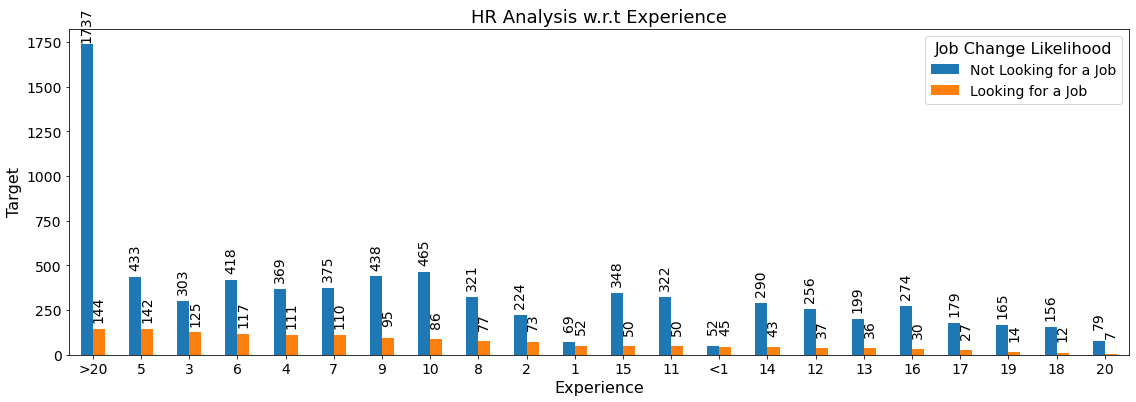

In [20]:
# Dependancy of Experience on Target Variable

Experience_in_years_crosstab=pd.crosstab(index=df_train['experience'],columns=df_train['target']).sort_values(by=1.0,ascending=False)
Experience_in_years_crosstab["Job Changers' Percentage (%)"]=round(Experience_in_years_crosstab[1]/(Experience_in_years_crosstab[0]+
                                                                                                    Experience_in_years_crosstab[1])*100,2)
print(Experience_in_years_crosstab)


# Let's plot the result and visualize.

g=Experience_in_years_crosstab.drop(["Job Changers' Percentage (%)"], axis=1).plot(kind='bar',stacked=False,figsize=(19,6))
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   fontsize=14,
                   xytext = (0, 20), 
                   textcoords = 'offset points',
                   rotation='vertical')
plt.xticks(rotation = 0,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Experience',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('HR Analysis w.r.t Experience',fontsize=18)
plt.legend(['Not Looking for a Job','Looking for a Job'],title='Job Change Likelihood',title_fontsize=16,prop={"size":14})

* Employees having 20+ years of Experience are the most Job changers and Surprisingly,there are less Job changers with Experience between 10 to 20 years.

In [21]:
#Company Size

df_train.company_size.value_counts()

50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64

target         0.0  1.0  Job Changers' Percentage (%)
company_size                                         
50-99         1660  326                         16.41
100-500       1532  282                         15.55
10000+        1184  265                         18.29
10/49          755  196                         20.61
1000-4999      794  136                         14.62
<10            714  126                         15.00
500-999        499   93                         15.71
5000-9999      334   59                         15.01


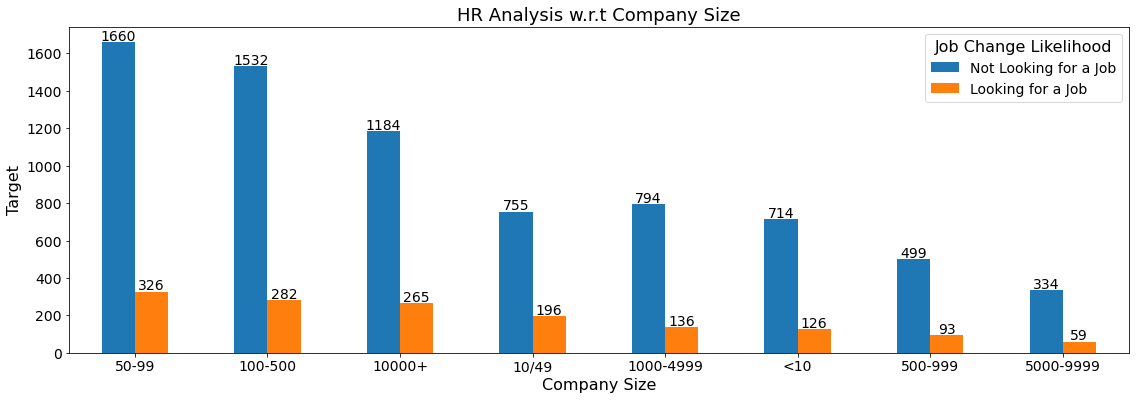

In [22]:
# Dependancy of Company Size on Target Variable

Company_Size_crosstab=pd.crosstab(index=df_train['company_size'],columns=df_train['target']).sort_values(by=1.0,ascending=False)
Company_Size_crosstab["Job Changers' Percentage (%)"]=round(Company_Size_crosstab[1]/(Company_Size_crosstab[0]+
                                                                                      Company_Size_crosstab[1])*100,2)
print(Company_Size_crosstab)


# Let's plot the result and visualize.

g=Company_Size_crosstab.drop(["Job Changers' Percentage (%)"], axis=1).plot(kind='bar',stacked=False,figsize=(19,6))
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   fontsize=14,
                   xytext = (0, 6), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Company Size',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('HR Analysis w.r.t Company Size',fontsize=18)
plt.legend(['Not Looking for a Job','Looking for a Job'],title='Job Change Likelihood',title_fontsize=16,prop={"size":14})

In [23]:
#Last New Job

df_train.last_new_job.value_counts()

1        3838
>4       1965
2        1570
3         610
4         599
never     373
Name: last_new_job, dtype: int64

target         0.0  1.0  Job Changers' Percentage (%)
last_new_job                                         
1             3156  682                         17.77
2             1291  279                         17.77
>4            1742  223                         11.35
3              508  102                         16.72
4              498  101                         16.86
never          277   96                         25.74


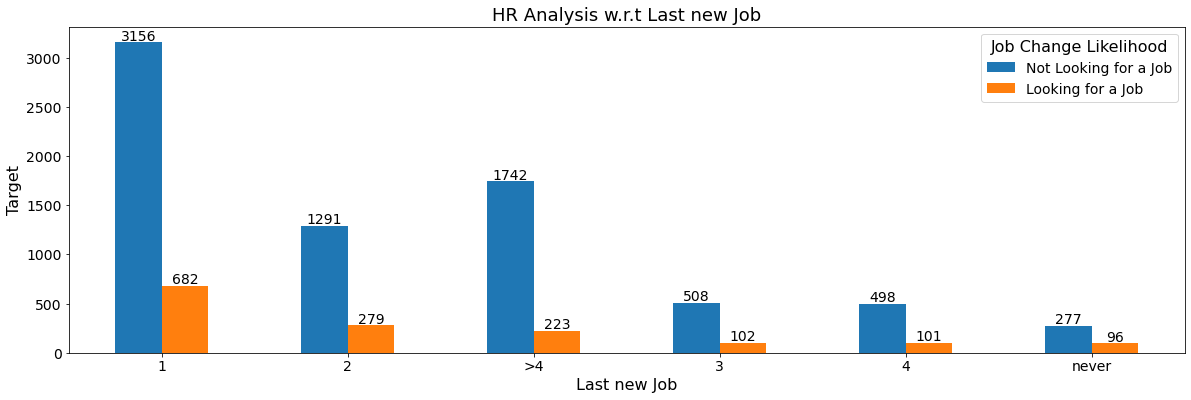

In [24]:
# Dependancy of Last New Job on Target Variable

Last_New_Job_crosstab=pd.crosstab(index=df_train['last_new_job'],columns=df_train['target']).sort_values(by=1.0,ascending=False)
Last_New_Job_crosstab["Job Changers' Percentage (%)"]=round(Last_New_Job_crosstab[1]/(Last_New_Job_crosstab[0]+
                                                                                      Last_New_Job_crosstab[1])*100,2)
print(Last_New_Job_crosstab)


# Let's plot the result and visualize.

g=Last_New_Job_crosstab.drop(["Job Changers' Percentage (%)"], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   fontsize=14,
                   xytext = (0, 6), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Last new Job',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('HR Analysis w.r.t Last new Job',fontsize=18)
plt.legend(['Not Looking for a Job','Looking for a Job'],title='Job Change Likelihood',title_fontsize=16,prop={"size":14})

* Employees having 1 year Experience in the Current Company are the most Job Changers.

Text(0.5, 1.0, 'Histogram plot of Employee Training Hours')

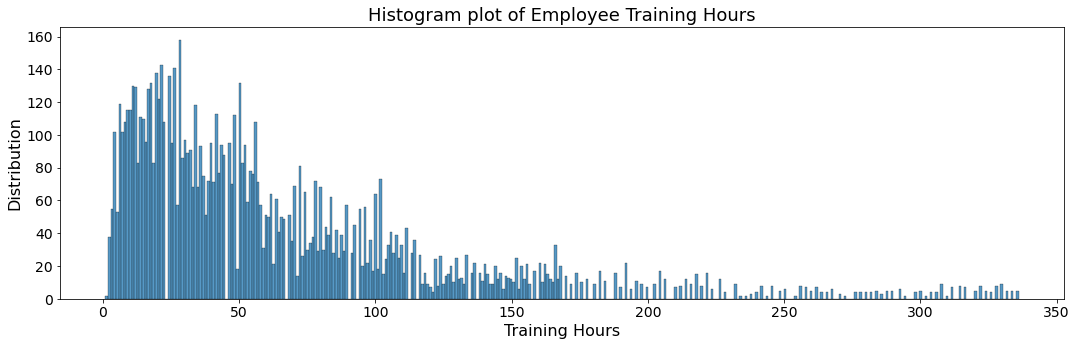

In [25]:
# Let's analyze the No of training hrs of the Employees.

plt.figure(figsize=(18,5))
sns.histplot(df_train.training_hours,bins=350)
plt.xticks(rotation = 0,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Training Hours',fontsize=16)
plt.ylabel('Distribution',fontsize=16)
plt.title('Histogram plot of Employee Training Hours',fontsize=18)

* Most Employees have undergone about 50 hrs of training and some of them have undergone Extensive training of more than 100 hrs.

Text(0.5, 1.0, 'Box Plot of Employee Training Hours')

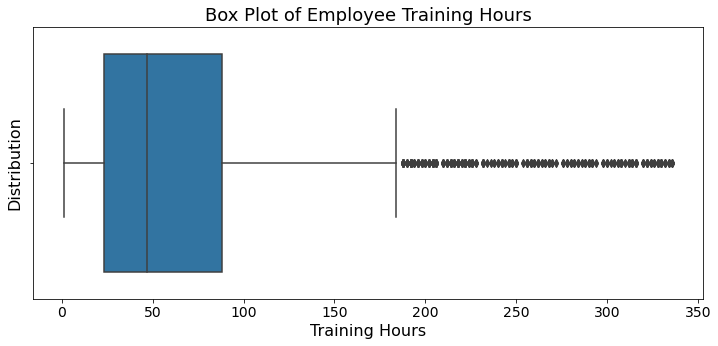

In [26]:
# Checking for outliers.

plt.figure(figsize=(12,5))
sns.boxplot(x=df_train.training_hours)
plt.xticks(rotation = 0,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Training Hours',fontsize=16)
plt.ylabel('Distribution',fontsize=16)
plt.title('Box Plot of Employee Training Hours',fontsize=18)

Text(0.5, 1.0, 'Training Hours')

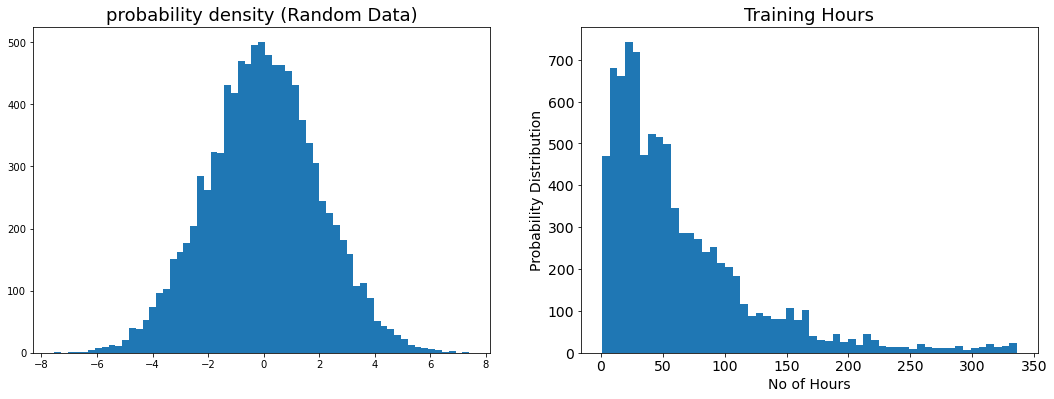

In [27]:
x_random = np.random.normal(0, 2, 10000)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('No of Hours',fontsize=14)
plt.ylabel('Probability Distribution',fontsize=14)

ax1.hist(x_random, bins='auto')
ax1.set_title('probability density (Random Data)',fontsize=18)

ax2.hist(df_train.training_hours, bins='auto')
ax2.set_title('Training Hours',fontsize=18)

* **The Training_hours feature is negatively Skewed.**
* **But, after applying log & square root transformations, the data was almost positively skewed but, the Score of the feature went down.**
* **So, it's better to keep it in it's original form**

In [28]:
# Let's partition the data into "Normal", "Extensive" & "Rigorous" Training

labels=['Normal Training','Extensive Training','Rigorous Training']

df_train['Training_length']=pd.cut(df_train.training_hours,[0,100,200,350],right=False,labels=labels)

target               0.0   1.0  Job Changers' Percentage (%)
Training_length                                             
Normal Training     5922  1190                         16.73
Extensive Training  1221   235                         16.14
Rigorous Training    329    58                         14.99


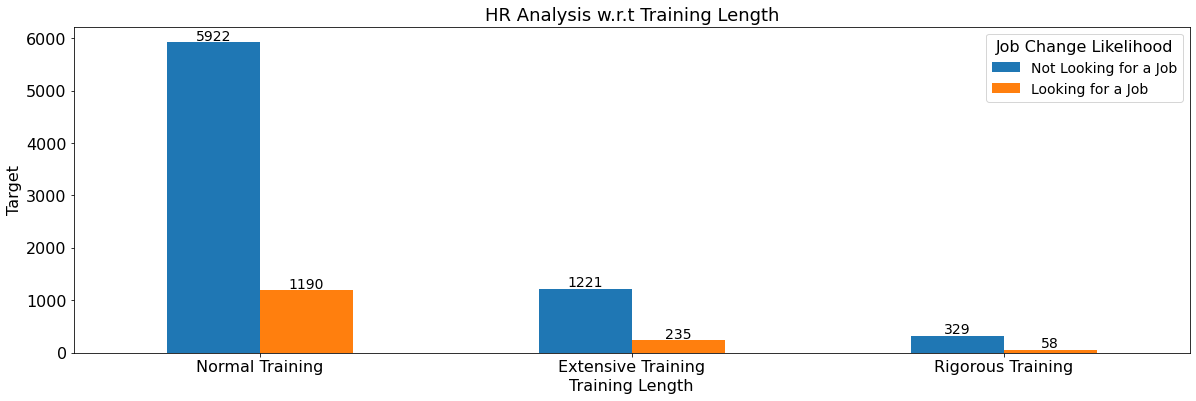

In [29]:
# Dependancy of Training Length on Target Variable

Training_length_crosstab=pd.crosstab(index=df_train['Training_length'],columns=df_train['target']).sort_values(by=1.0,ascending=False)
Training_length_crosstab["Job Changers' Percentage (%)"]=round(Training_length_crosstab[1]/(Training_length_crosstab[0]+
                                                                                      Training_length_crosstab[1])*100,2)
print(Training_length_crosstab)


# Let's plot the result and visualize.

g=Training_length_crosstab.drop(["Job Changers' Percentage (%)"], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   fontsize=14,
                   xytext = (0, 6), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Training Length',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('HR Analysis w.r.t Training Length',fontsize=18)
plt.legend(['Not Looking for a Job','Looking for a Job'],title='Job Change Likelihood',title_fontsize=16,prop={"size":14})

* Most of the Job Changing Employees have undergone training for less than 100 hrs.

* **Low City development for CDI scores between 0.0 and 0.5.**
* **Medium City development for CDI scores between 0.5 and 0.8.**
* **High City development for CDI scores between 0.8 and 1.0.**

Text(0.5, 1.0, 'Histogram plot of City Development Index')

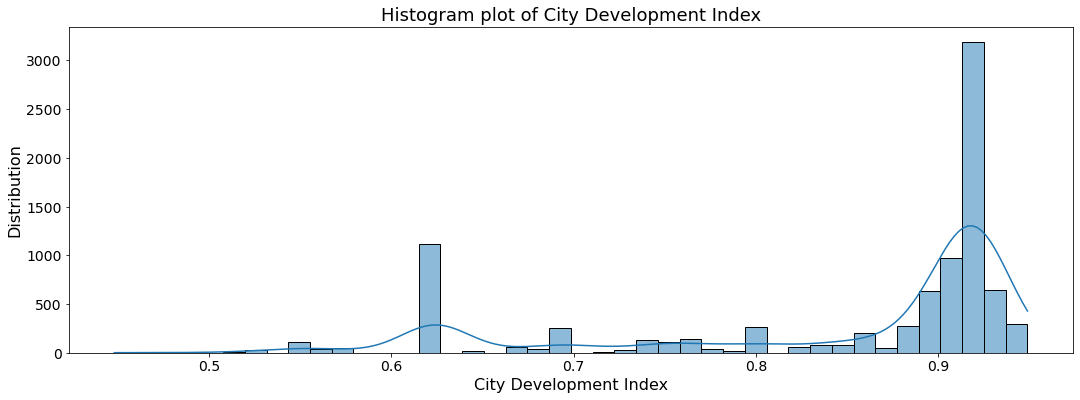

In [30]:
# Let's analyze the Probability Distribution of City development index through a histogram.

plt.figure(figsize=(18,6))
sns.histplot(x=df_train.city_development_index,kde=True)
plt.xticks(rotation = 0,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('City Development Index',fontsize=16)
plt.ylabel('Distribution',fontsize=16)
plt.title('Histogram plot of City Development Index',fontsize=18)

* **Most of the Employees live in cities with CDI greater than 0.9 which indicates High development.**

In [31]:
# Let's round off the values of CDI to 3 decimals.

df_train.city_development_index=df_train.city_development_index.apply(lambda x: round(x,3))

Text(0.5, 1.0, 'Cities w.r.t City Development Index Level')

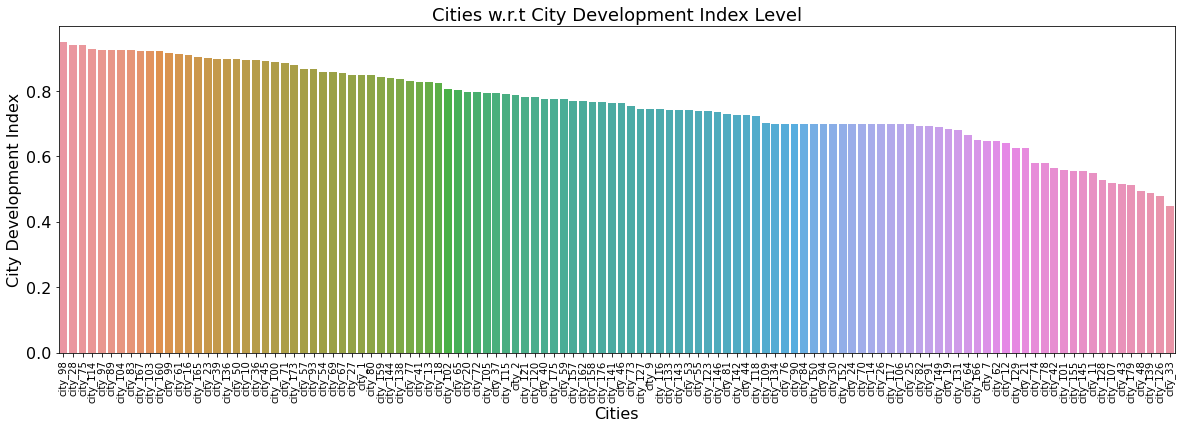

In [32]:
plt.figure(figsize=(20,6))
sns.barplot(x='city',y='city_development_index',data=df_train.sort_values(by='city_development_index',ascending=False))
plt.xticks(rotation = 90,fontsize=10)
plt.yticks(fontsize=16)
plt.xlabel('Cities',fontsize=16)
plt.ylabel('City Development Index',fontsize=16)
plt.title('Cities w.r.t City Development Index Level',fontsize=18)

* **Almost All cities have a CDI above 0.4.**
* **Let's Categorize the CDI to "Low Development", "Medium Development" & "High Development" for clear understanding.**

In [33]:
def update_CDI(index):
    if(index >= 0 and index <= 0.5):
        return "Less Development"
    elif(index > 0.5 and index <= 0.7):
        return "Moderate Development"
    elif(index > 0.7):
        return "High Developement"

In [34]:
# Let's categorize the City development level into Less, Moderate & High Development.

df_train["City_development_level"]=df_train.city_development_index.apply(update_CDI)
df_train.City_development_level.value_counts()

High Developement       7227
Moderate Development    1718
Less Development          10
Name: City_development_level, dtype: int64

target                   0.0  1.0  Job Changers' Percentage (%)
City_development_level                                         
Moderate Development     883  835                         48.60
High Developement       6582  645                          8.92
Less Development           7    3                         30.00


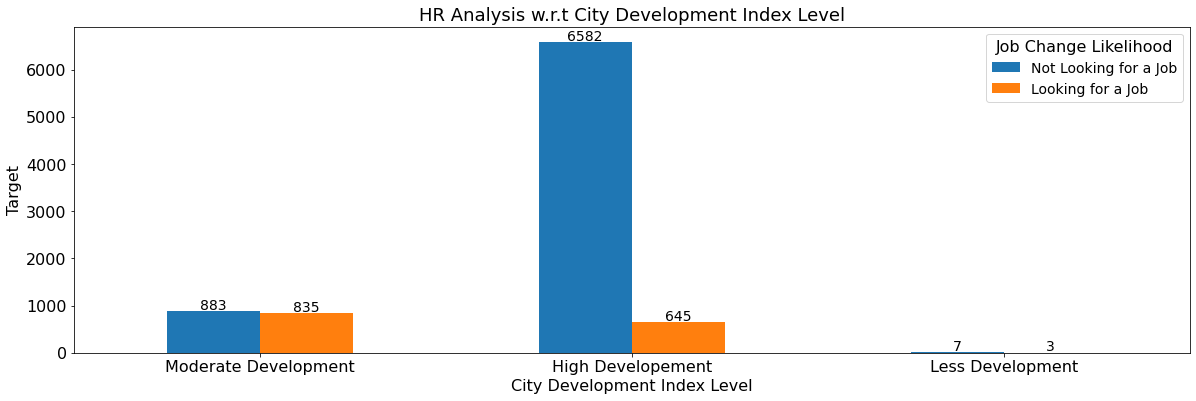

In [35]:
# Dependancy of City Development Level on Target Variable

CDI_crosstab=pd.crosstab(index=df_train['City_development_level'],columns=df_train['target']).sort_values(by=1.0,ascending=False)
CDI_crosstab["Job Changers' Percentage (%)"]=round(CDI_crosstab[1]/(CDI_crosstab[0]+CDI_crosstab[1])*100,2)
print(CDI_crosstab)


# Let's plot the result and visualize.

g=CDI_crosstab.drop(["Job Changers' Percentage (%)"], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   fontsize=14,
                   xytext = (0, 6), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('City Development Index Level',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('HR Analysis w.r.t City Development Index Level',fontsize=18)
plt.legend(['Not Looking for a Job','Looking for a Job'],title='Job Change Likelihood',title_fontsize=16,prop={"size":14})

* **Most of the Job changers live in Moderately developed cities.**

# Data Pre-processing

In [36]:
# Label Encoding

df_train.education_level=df_train.education_level.map({"Primary School":0,"High School":1,"Graduate":2,"Masters":3,"Phd":4})

df_train.experience=df_train.experience.map({"<1":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"11":11,"12":12,"13":13,
                                             '14':14,"15":15,"16":16,"17":17,"18":18,"19":19,"20":20,">20":21})

df_train.City_development_level=df_train.City_development_level.map({"Less Development":0,"Moderate Development":1,"High Developement":2})

df_train.gender=df_train.gender.map({'Male':0,'Female':1,'Other':2})

df_train.enrolled_university=df_train.enrolled_university.map({'Full time course':0,'Part time course':1,'no_enrollment':2})

df_train.major_discipline=df_train.major_discipline.map({'STEM':0,'Humanities':1,'Business Degree':2,'Arts':3,'Other':4,'No Major':5})

df_train.company_size=df_train.company_size.map({'10000+':0,'5000-9999':1,'1000-4999':2,'500-999':3,'100-500':4,'50-99':5,'10/49':6,
                                                '<10':7})

df_train.company_type=df_train.company_type.map({'Pvt Ltd':0,'Public Sector':1,'Funded Startup':2,'Early Stage Startup':3,'NGO':4,
                                                'Other':5})

df_train.last_new_job=df_train.last_new_job.map({'>4':0,'4':1,'3':2,'2':3,'1':4,'never':5})

df_train.Training_length=df_train.Training_length.map({'Rigorous Training':0,'Extensive Training':1,'Normal Training':2})



# Let's apply one-hot Encoding to relevent_experience & city Features.

df_train=pd.get_dummies(data=df_train,columns=['relevent_experience','city'],drop_first=True)


# let's drop the Employee ID field

df_train.drop(['enrollee_id'],axis=1,inplace=True)

In [37]:
X_temp=df_train.drop('target',axis=1)
y_temp=df_train.target
print(X_temp.columns)

Index(['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'training_hours',
       ...
       'city_city_84', 'city_city_89', 'city_city_9', 'city_city_90',
       'city_city_91', 'city_city_93', 'city_city_94', 'city_city_97',
       'city_city_98', 'city_city_99'],
      dtype='object', length=128)


In [38]:
X_temp.rename(columns={'company_size_<10':'company_size_lessthan10','last_new_job_>4':'last_new_job_greaterthan4'},inplace=True)

# Feature Selection

* Let's use SelectKBest function to obtain scores of all the Dataset features.

In [39]:
Best_Params=SelectKBest(score_func=chi2, k='all')
Best_Params.fit(X_temp,y_temp)

SelectKBest(k='all', score_func=<function chi2 at 0x7f2c1b1b5dd0>)

In [40]:
df_scores=pd.DataFrame(Best_Params.scores_)
df_columns=pd.DataFrame(X_temp.columns)
df_scores_evaluation=pd.concat([df_scores,df_columns],axis=1)
df_scores_evaluation.columns=['Scores','Features']
df_scores_evaluation=df_scores_evaluation.nlargest(131,'Scores')
print(df_scores_evaluation)

          Scores                Features
72   1451.259556            city_city_21
5    1300.160940              experience
11    136.936061  City_development_level
23    111.554879            city_city_11
9      80.190833          training_hours
..           ...                     ...
85      0.004178            city_city_41
7       0.000884            company_type
29      0.000049            city_city_12
120     0.000049             city_city_9
103     0.000049            city_city_69

[128 rows x 2 columns]


In [41]:
X_new=copy.deepcopy(X_temp)
print(len(X_temp.columns))
print(len(X_new.columns))
print(X_new.columns)

y_new=copy.deepcopy(y_temp)

128
128
Index(['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'training_hours',
       ...
       'city_city_84', 'city_city_89', 'city_city_9', 'city_city_90',
       'city_city_91', 'city_city_93', 'city_city_94', 'city_city_97',
       'city_city_98', 'city_city_99'],
      dtype='object', length=128)


In [42]:
# Let's split the data into Training & Test sets.

X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.20,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7164, 128)
(1791, 128)
(7164,)
(1791,)


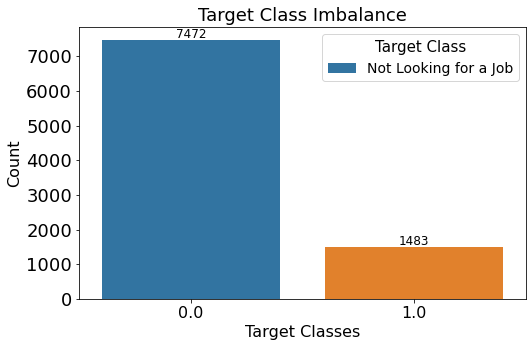

In [43]:
# Checking Target Class Imbalance

plt.figure(figsize=(8,5))
g=sns.countplot(x="target",data=df_train)
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   fontsize=12,
                   xytext = (0, 6), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel('Target Classes',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Target Class Imbalance',fontsize=18)
plt.legend(['Not Looking for a Job','Looking for a Job'],title='Target Class',title_fontsize=15,prop={"size":14})

* **As the Target label is highly Imbalanced, we need to upsample the lower class (which is 1.0 in this case).**
* **If we downsample the Majority class, we might lose significant data.**
* **We can also use SMOTE (Synthetic Minority Oversampling Technique) which creates synthetic (duplicate) data points taken from the Majority class and can be very effective.**
* **We can apply both resampling methods and compare the results.**

In [44]:
# SMOTE

print("Counts of Label 0 before Oversampling: {}".format(sum(y_train == 0.0)))

print("Counts of Label 1 before Oversampling: {}".format(sum(y_train == 1.0)))

smote=SMOTE(random_state=0)

X_train_smote, y_train_smote=smote.fit_resample(X_train,y_train)

print("Shape of X_train after Oversampling: {}".format(X_train_smote.shape))

print("Shape of y_train after Oversampling: {}".format(y_train_smote.shape))

print("Counts of Label 0 after Oversampling: {}".format(sum(y_train_smote==0.0)))

print("Counts of Label 1 after Oversampling: {}".format(sum(y_train_smote==1.0)))

Counts of Label 0 before Oversampling: 5961
Counts of Label 1 before Oversampling: 1203
Shape of X_train after Oversampling: (11922, 128)
Shape of y_train after Oversampling: (11922,)
Counts of Label 0 after Oversampling: 5961
Counts of Label 1 after Oversampling: 5961


In [45]:
# Let's use resample method from sklearn library to Oversample the minority class.

X=pd.concat([X_train,y_train],axis=1)

Emp_NotLeaving=X[X.target == 0]
Emp_Leaving=X[X.target == 1]

upsampled_Emp_Leaving=resample(Emp_Leaving,
                       replace=True,
                       n_samples=len(Emp_NotLeaving),
                       random_state=42)

upsampled_Data=pd.concat([Emp_NotLeaving,upsampled_Emp_Leaving])


y_train_upsampled=upsampled_Data.target
X_train_upsampled=upsampled_Data.drop('target',axis=1)


print(len(y_train_upsampled == 1))
print(len(y_train_upsampled == 0))

11922
11922


In [46]:
# Let's convert all the Dataset feature names into list so that we can pass the desired set of features to the models separately for 
#training. 

df_scores_evaluation=df_scores_evaluation.Features.to_list()

In [47]:
# From the SelectKBest method, I have obtained the scores for all features & from trial & error technique, I have determined the 
# Number of features to pass to each model for obtaining the best results.
# So, I'll be dropping the respective number of features below.

lr_ridge_features=df_scores_evaluation[55:]    # dropping all features except the top 55.
svm_features=df_scores_evaluation[90:]
dt_features=df_scores_evaluation[100:]
bc_lgbm_features=df_scores_evaluation[30:]
rf_features=df_scores_evaluation[120:]

print(len(lr_ridge_features))
print(len(svm_features))
print(len(dt_features))
print(len(bc_lgbm_features))
print(len(rf_features))

73
38
28
98
8


In [48]:
# I'm dropping the above mentioned features explicitely from the dataset & passing the best set of features to each model.

lr_ridge_X_train=copy.deepcopy(X_train_upsampled)
lr_ridge_X_test=copy.deepcopy(X_test)
lr_ridge_X_train.drop(lr_ridge_features,axis=1,inplace=True)
lr_ridge_X_test.drop(lr_ridge_features,axis=1,inplace=True)

svm_X_train=copy.deepcopy(X_train_smote)
svm_X_test=copy.deepcopy(X_test)
svm_X_train.drop(svm_features,axis=1,inplace=True)
svm_X_test.drop(svm_features,axis=1,inplace=True)

dt_X_train=copy.deepcopy(X_train_upsampled)
dt_X_test=copy.deepcopy(X_test)
dt_X_train.drop(dt_features,axis=1,inplace=True)
dt_X_test.drop(dt_features,axis=1,inplace=True)

bc_lgbm_X_train=copy.deepcopy(X_train_smote)
bc_lgbm_X_test=copy.deepcopy(X_test)
bc_lgbm_X_train.drop(bc_lgbm_features,axis=1,inplace=True)
bc_lgbm_X_test.drop(bc_lgbm_features,axis=1,inplace=True)

rf_X_train=copy.deepcopy(X_train_upsampled)
rf_X_test=copy.deepcopy(X_test)
rf_X_train.drop(rf_features,axis=1,inplace=True)
rf_X_test.drop(rf_features,axis=1,inplace=True)

In [49]:
# LOGISTIC REGRESSION MODEL

lr_model=LogisticRegression()

t0=time.time()

# Hyper-parameter tuning
#solvers = ['newton-cg', 'lbfgs', 'liblinear', 'saga']
#penalty = ['l2']
#lr_c = [100, 10, 1.0, 0.1, 0.01]

solvers = ['newton-cg']
penalty=['l2']
lr_c = [10]

lr_grid = dict(solver=solvers,penalty=penalty,C=lr_c)

# cross-validation using Repeated Stratified K-fold method.
lr_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Grid Search CV method loops through the different hyper parameters determining the optimal values.
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_grid,verbose=1, cv=lr_cv, n_jobs=-1, scoring='accuracy',error_score=0)

# Fitting the Model to the Dataset.
lr_grid_result=lr_grid_search.fit(lr_ridge_X_train,y_train_upsampled)

print("training time:", round(time.time()-t0, 3), "s")

# returns the best hyper parameters.
#r_grid_result.best_params_

Fitting 30 folds for each of 1 candidates, totalling 30 fits
training time: 13.714 s


In [50]:
# Making predictions using our model.
lr_grid_predictions=lr_grid_result.predict(lr_ridge_X_test)

LOGISTIC REGRESSION Model Performance Metrics:
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1511
         1.0       0.47      0.54      0.50       280

    accuracy                           0.83      1791
   macro avg       0.69      0.71      0.70      1791
weighted avg       0.84      0.83      0.84      1791

CONFUSION MATRIX :
[[1339  172]
 [ 130  150]]


NO SKILL CLASSIFIER: ROC AUC=0.500
LOGISTIC REGRESSION: ROC AUC=0.711


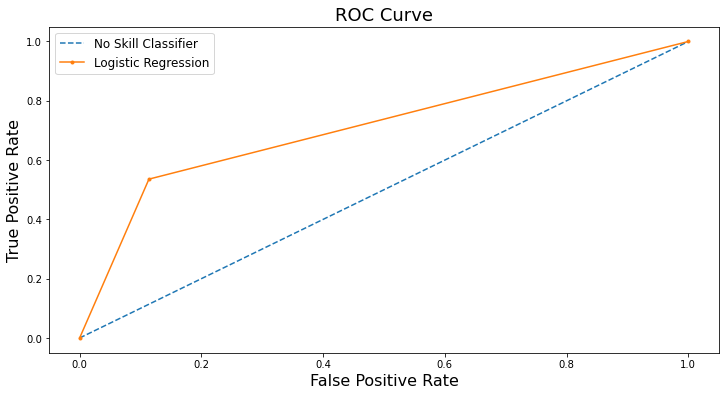

Precision-Recall AUC Score: 0.537


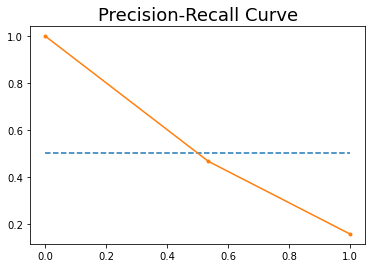

In [51]:
print("LOGISTIC REGRESSION Model Performance Metrics:")
print(classification_report(y_test,lr_grid_predictions))

#print(classification_report(Test_Label,lr_grid_result_test_data_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,lr_grid_predictions))
#print(confusion_matrix(Test_Label,lr_grid_result_test_data_predictions))
print("\n")

plt.figure(figsize=(12,6))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,lr_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

#fpr, tpr, _ = roc_curve(Test_Label,lr_grid_result_test_data_predictions)

plt.plot(fpr, tpr, marker='.', label='Logistic Regression')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

#ns_probs = [0 for _ in range(len(Test_Label))]

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)

#ns_auc = roc_auc_score(Test_Label, ns_probs)

lr_auc = roc_auc_score(y_test, lr_grid_predictions)

#lr_auc = roc_auc_score(Test_Label, lr_grid_result_test_data_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('LOGISTIC REGRESSION: ROC AUC=%.3f' % (lr_auc))

plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title("ROC Curve",fontsize=18)
plt.legend(prop={'size':12})
plt.show()


# Let's plot the Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, lr_grid_predictions)
lr_auc_score = auc(recall, precision)

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.title('Precision-Recall Curve',fontsize=18)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
print('Precision-Recall AUC Score: %.3f' % lr_auc_score)
plt.show()

In [52]:
rc_model=RidgeClassifier()

t0=time.time()

#alpha = [0.2, 0.4, 0.6, 0.8, 1.0]

alpha=[0.8]

rc_grid = dict(alpha=alpha)

rc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

rc_grid_search = GridSearchCV(estimator=rc_model, param_grid=rc_grid,verbose=1, cv=rc_cv, scoring='accuracy',error_score=0)

rc_grid_result=rc_grid_search.fit(lr_ridge_X_train,y_train_upsampled)

print("training time:", round(time.time()-t0, 3), "s")

#rc_grid_result.best_params_

Fitting 30 folds for each of 1 candidates, totalling 30 fits
training time: 1.585 s


In [53]:
rc_grid_predictions=rc_grid_result.predict(lr_ridge_X_test)

RIDGE CLASSIFIER Model Performance Metrics:
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91      1511
         1.0       0.49      0.52      0.51       280

    accuracy                           0.84      1791
   macro avg       0.70      0.71      0.71      1791
weighted avg       0.85      0.84      0.84      1791

CONFUSION MATRIX :
[[1362  149]
 [ 134  146]]


NO SKILL CLASSIFIER: ROC AUC=0.500
RIDGE CLASSIFIER: ROC AUC=0.711


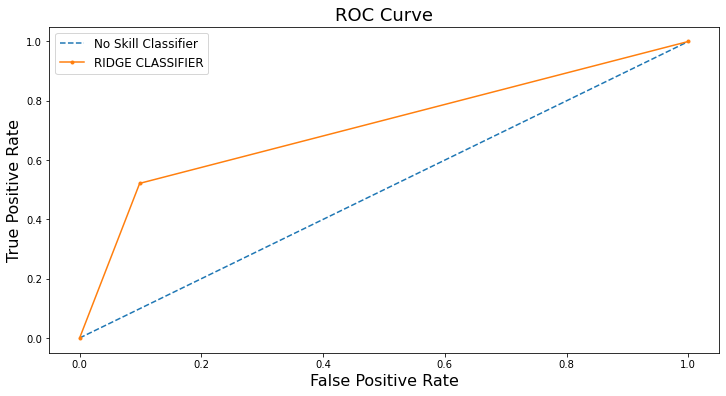

Precision-Recall AUC Score: 0.546


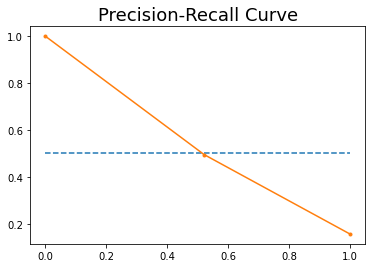

In [54]:
print("RIDGE CLASSIFIER Model Performance Metrics:")
print(classification_report(y_test,rc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,rc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,rc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

plt.plot(fpr, tpr, marker='.', label='RIDGE CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
rc_auc = roc_auc_score(y_test, rc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('RIDGE CLASSIFIER: ROC AUC=%.3f' % (rc_auc))

plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title("ROC Curve",fontsize=18)
plt.legend(prop={'size':12})
plt.show()

# Let's plot the Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, rc_grid_predictions)
rc_auc_score = auc(recall, precision)

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.title('Precision-Recall Curve',fontsize=18)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
print('Precision-Recall AUC Score: %.3f' % rc_auc_score)
plt.show()

In [55]:
svm_model=LinearSVC()

t0=time.time()

#svm_C=[0.8,1,2,4]

svm_C=[2]
svc_class_weight=['balanced']
dual=[False]

svm_grid=dict(C=svm_C,class_weight=svc_class_weight,dual=dual)

svm_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_grid, cv=svm_cv, scoring='accuracy',error_score=0)

svm_grid_result=svm_grid_search.fit(svm_X_train,y_train_smote) 

print("training time:", round(time.time()-t0, 3), "s")

#svm_grid_result.best_params_

training time: 3.818 s


In [56]:
svm_grid_predictions=svm_grid_result.predict(svm_X_test)

SVM CLASSIFIER Model Performance Metrics:
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      1511
         1.0       0.45      0.54      0.49       280

    accuracy                           0.83      1791
   macro avg       0.68      0.71      0.69      1791
weighted avg       0.84      0.83      0.83      1791

CONFUSION MATRIX :
[[1328  183]
 [ 129  151]]


NO SKILL CLASSIFIER: ROC AUC=0.500
SVM CLASSIFIER: ROC AUC=0.709


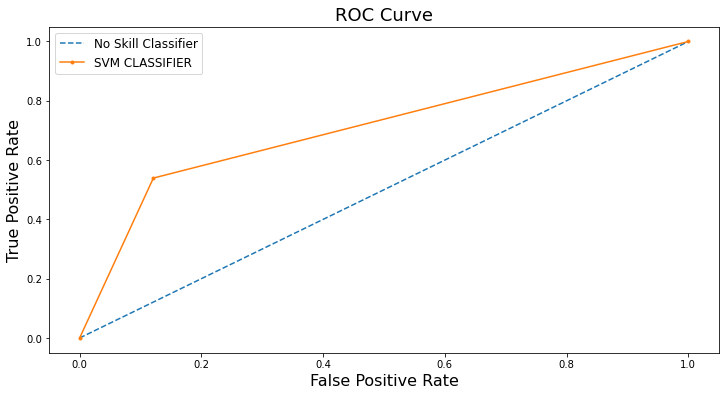

Precision-Recall AUC Score: 0.532


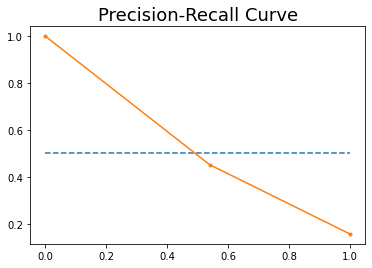

In [57]:
print("SVM CLASSIFIER Model Performance Metrics:")
print(classification_report(y_test,svm_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,svm_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,svm_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

plt.plot(fpr, tpr, marker='.', label='SVM CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
svm_auc = roc_auc_score(y_test, svm_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('SVM CLASSIFIER: ROC AUC=%.3f' % (svm_auc))

plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title("ROC Curve",fontsize=18)
plt.legend(prop={'size':12})
plt.show()


# Let's plot the Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, svm_grid_predictions)
svm_auc_score = auc(recall, precision)

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.title('Precision-Recall Curve',fontsize=18)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
print('Precision-Recall AUC Score: %.3f' % svm_auc_score)
plt.show()

In [58]:
dtc_model=DecisionTreeClassifier()

t0=time.time()

#dtc_criterion=['gini','entropy']
#dtc_max_depth=[14,16,18,20,24,28]
#dtc_max_features = ['sqrt', 'log2']
#dtc_min_samples_split = [6,8,10,12]
#dtc_min_samples_leaf = [1, 2, 5, 10]

dtc_criterion=['gini']
dtc_max_depth=[12]
dtc_max_features = ['sqrt']
dtc_min_samples_split = [8]
dtc_min_samples_leaf = [1]
dtc_class_weight=['balanced']


dtc_grid=dict(criterion=dtc_criterion,max_depth=dtc_max_depth,max_features=dtc_max_features,min_samples_split=dtc_min_samples_split,
             min_samples_leaf=dtc_min_samples_leaf,class_weight=dtc_class_weight)

dtc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

dtc_grid_search = GridSearchCV(estimator=dtc_model, param_grid=dtc_grid, cv=dtc_cv,n_jobs=-1,verbose=1, scoring='accuracy',error_score=0)

dtc_grid_result=dtc_grid_search.fit(dt_X_train,y_train_upsampled) 

print("training time:", round(time.time()-t0, 3), "s")

#dtc_grid_result.best_params_

Fitting 30 folds for each of 1 candidates, totalling 30 fits
training time: 0.587 s


In [59]:
dtc_grid_predictions=dtc_grid_result.predict(dt_X_test)

DECISION TREE CLASSIFIER Model Performance Metrics:
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88      1511
         1.0       0.40      0.54      0.46       280

    accuracy                           0.80      1791
   macro avg       0.65      0.69      0.67      1791
weighted avg       0.83      0.80      0.81      1791

CONFUSION MATRIX :
[[1285  226]
 [ 130  150]]


NO SKILL CLASSIFIER: ROC AUC=0.500
DECISION TREE CLASSIFIER: ROC AUC=0.693


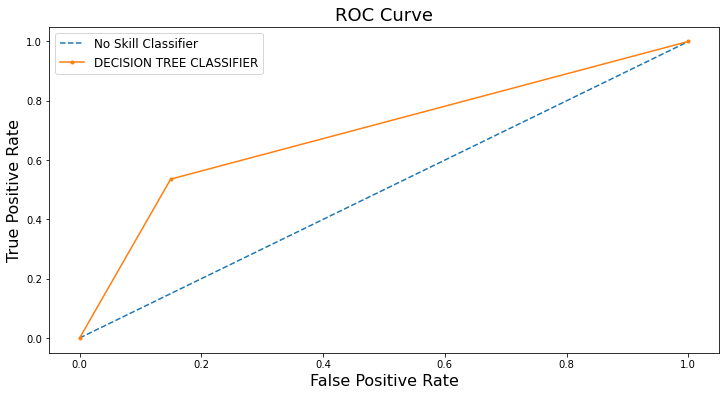

AUC Score: 0.504


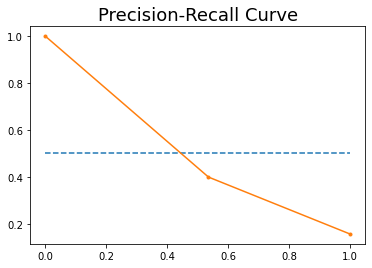

In [60]:
print("DECISION TREE CLASSIFIER Model Performance Metrics:")
print(classification_report(y_test,dtc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,dtc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,dtc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

plt.plot(fpr, tpr, marker='.', label='DECISION TREE CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
dtc_auc = roc_auc_score(y_test, dtc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('DECISION TREE CLASSIFIER: ROC AUC=%.3f' % (dtc_auc))

plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title("ROC Curve",fontsize=18)
plt.legend(prop={'size':12})
plt.show()


# Let's plot the Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, dtc_grid_predictions)
dtc_auc_score = auc(recall, precision)

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.title('Precision-Recall Curve',fontsize=18)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
print('AUC Score: %.3f' % dtc_auc_score)
plt.show()

In [61]:
#bc_model=BaggingClassifier()

bc_model=BalancedBaggingClassifier()

#print(bc_model.get_params().keys())

#bc_max_samples=[0.8,1.0,1.2,1.4]
#bc_max_features=[12,14,16,18]
#bc_base_estimator=KNeighborsClassifier()
#bc_bootstrap=[True,False]
#bc_bootstrap_features=[True,False]

t0=time.time()

bc_n_estimators = [1000]
bc_max_samples=[1.0]
bc_max_features=[12]
bc_bootstrap=[False]
bc_bootstrap_features=[False]

bc_grid = dict(n_estimators=bc_n_estimators,max_samples=bc_max_samples,max_features=bc_max_features,bootstrap=bc_bootstrap,
              bootstrap_features=bc_bootstrap_features)

bc_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

bc_grid_search = GridSearchCV(estimator=bc_model, param_grid=bc_grid, n_jobs=-1, verbose=1, cv=bc_cv, scoring='accuracy',error_score=0)

bc_grid_result=bc_grid_search.fit(bc_lgbm_X_train,y_train_smote)

print("training time:", round(time.time()-t0, 3), "s")

bc_grid_result.best_params_

Fitting 15 folds for each of 1 candidates, totalling 15 fits
training time: 135.492 s


{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 12,
 'max_samples': 1.0,
 'n_estimators': 1000}

In [62]:
bc_grid_predictions=bc_grid_result.predict(bc_lgbm_X_test)

BAGGING CLASSIFIER Model Performance Metrics:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      1511
         1.0       0.52      0.49      0.50       280

    accuracy                           0.85      1791
   macro avg       0.71      0.70      0.71      1791
weighted avg       0.85      0.85      0.85      1791

CONFUSION MATRIX :
[[1384  127]
 [ 143  137]]


NO SKILL CLASSIFIER: ROC AUC=0.500
BAGGING CLASSIFIER: ROC AUC=0.703


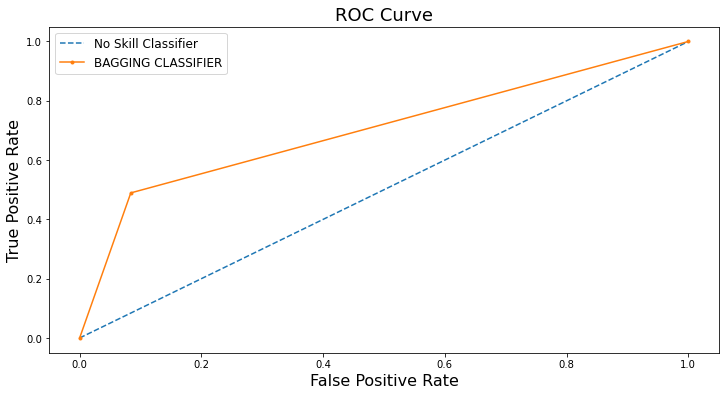

AUC Score: 0.544


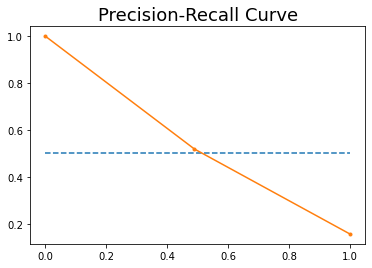

In [63]:
print("BAGGING CLASSIFIER Model Performance Metrics:")
print(classification_report(y_test,bc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,bc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,bc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

plt.plot(fpr, tpr, marker='.', label='BAGGING CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)             
bc_auc = roc_auc_score(y_test, bc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('BAGGING CLASSIFIER: ROC AUC=%.3f' % (bc_auc))

plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title("ROC Curve",fontsize=18)
plt.legend(prop={'size':12})
plt.show()


# Let's plot the Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, bc_grid_predictions)
bc_auc_score = auc(recall, precision)

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.title('Precision-Recall Curve',fontsize=18)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
print('AUC Score: %.3f' % bc_auc_score)
plt.show()

In [64]:
rfc_model=RandomForestClassifier()

t0=time.time()


#rfc_max_features = ['sqrt', 'log2']
#rfc_min_samples_split = [1,2,4,6,8]
#rfc_min_samples_leaf = [1, 2, 5, 10]
#rfc_max_depth = [10,12,14,16]


rfc_n_estimators = [1000]
rfc_max_features = ['sqrt']
rfc_max_depth = [12]
rfc_min_samples_split = [2]
rfc_min_samples_leaf = [1]
rfc_class_weight=['balanced']


#rfc_grid = dict(n_estimators=rfc_n_estimators,max_features=rfc_max_features,class_weight=rfc_class_weight,max_depth=rfc_max_depth,
#               min_samples_split=rfc_min_samples_split,min_samples_leaf=rfc_min_samples_leaf)

rfc_grid = dict(n_estimators=rfc_n_estimators,max_features=rfc_max_features,class_weight=rfc_class_weight,max_depth=rfc_max_depth,
               min_samples_split=rfc_min_samples_split,min_samples_leaf=rfc_min_samples_leaf)

rfc_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

rfc_grid_search = GridSearchCV(estimator=rfc_model, param_grid=rfc_grid, n_jobs=-1, verbose=3, cv=rfc_cv, scoring='accuracy',error_score=0)

rfc_grid_result=rfc_grid_search.fit(rf_X_train,y_train_upsampled)

print("training time:", round(time.time()-t0, 3)/60)

#rfc_grid_result.best_params_

Fitting 15 folds for each of 1 candidates, totalling 15 fits
training time: 0.9397333333333333


In [65]:
rfc_grid_predictions=rfc_grid_result.predict(rf_X_test)

RANDOM FOREST CLASSIFIER Model Performance Metrics:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      1511
         1.0       0.54      0.50      0.52       280

    accuracy                           0.86      1791
   macro avg       0.72      0.71      0.72      1791
weighted avg       0.85      0.86      0.85      1791

CONFUSION MATRIX :
[[1391  120]
 [ 139  141]]


NO SKILL CLASSIFIER: ROC AUC=0.500
RANDOM FOREST CLASSIFIER: ROC AUC=0.712


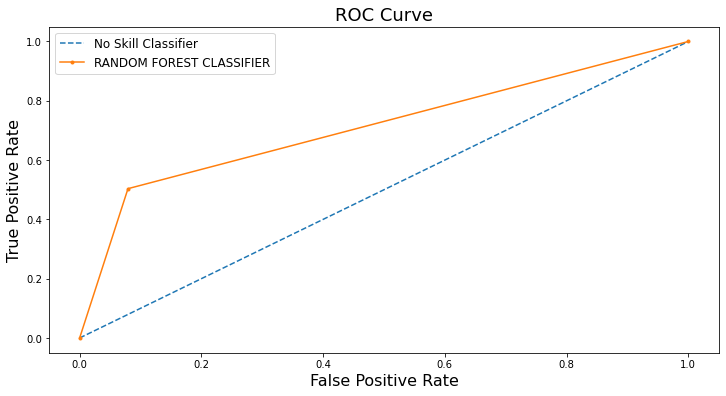

AUC Score: 0.561


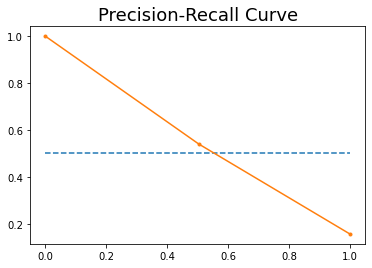

In [66]:
print("RANDOM FOREST CLASSIFIER Model Performance Metrics:")
print(classification_report(y_test,rfc_grid_predictions))

#print(classification_report(Test_Label,rfc_grid_Test_Data_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,rfc_grid_predictions))

#print(confusion_matrix(Test_Label,rfc_grid_Test_Data_predictions))

print("\n")

plt.figure(figsize=(12,6))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,rfc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

#fpr, tpr, _ = roc_curve(Test_Label,rfc_grid_Test_Data_predictions)    

plt.plot(fpr, tpr, marker='.', label='RANDOM FOREST CLASSIFIER')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

#ns_probs = [0 for _ in range(len(Test_Label))]

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)

#ns_auc = roc_auc_score(Test_Label, ns_probs)

rfc_auc = roc_auc_score(y_test, rfc_grid_predictions)

#rfc_auc = roc_auc_score(Test_Label, rfc_grid_Test_Data_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('RANDOM FOREST CLASSIFIER: ROC AUC=%.3f' % (rfc_auc))

plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title("ROC Curve",fontsize=18)
plt.legend(prop={'size':12})
plt.show()


# Let's plot the Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, rfc_grid_predictions)
rfc_auc_score = auc(recall, precision)

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.title('Precision-Recall Curve',fontsize=18)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
print('AUC Score: %.3f' % rfc_auc_score)
plt.show()

In [67]:
lgbc_model=LGBMClassifier(is_balance=False)

t0=time.time()

#lgbc_n_estimators=[600,700,800,900]
#lgbc_max_depth=[10,12,14,16]
#lgbc_num_leaves=[8,10,12,14]
#lgbc_learning_rate=[0.0001, 0.001, 0.01, 0.1, 1.0]
#lgbc_boosting_type=['gbdt', 'dart', 'goss']
#min_child_samples=[100,200,300,400,500]
#min_child_weight=[1e-2, 1e-1, 1, 1e1, 1e2]

lgbc_n_estimators=[800]
lgbc_max_depth=[14]
lgbc_num_leaves=[14]
lgbc_learning_rate=[0.1]
lgbc_boosting_type=['gbdt']
objective=['binary']
min_child_samples=[100]
min_child_weight=[10]


lgbc_grid=dict(n_estimators=lgbc_n_estimators,max_depth=lgbc_max_depth,num_leaves=lgbc_num_leaves,learning_rate=lgbc_learning_rate,
              boosting_type=lgbc_boosting_type,objective=objective,min_child_samples=min_child_samples,min_child_weight=min_child_weight)

lgbc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

lgbc_grid_search = GridSearchCV(estimator=lgbc_model, param_grid=lgbc_grid, n_jobs=-1,verbose=3, cv=lgbc_cv, scoring='accuracy',error_score=0)

lgbc_grid_result=lgbc_grid_search.fit(bc_lgbm_X_train,y_train_smote)

print("training time:", round(time.time()-t0, 3)/60)

#lgbc_grid_result.best_params_

Fitting 50 folds for each of 1 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: is_balance
training time: 0.3914


In [68]:
lgbc_grid_predictions=lgbc_grid_result.predict(bc_lgbm_X_test)

GRADIENT BOOSTING Model Performance Metrics:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      1511
         1.0       0.45      0.43      0.44       280

    accuracy                           0.83      1791
   macro avg       0.67      0.67      0.67      1791
weighted avg       0.83      0.83      0.83      1791

CONFUSION MATRIX :
[[1365  146]
 [ 159  121]]


NO SKILL CLASSIFIER: ROC AUC=0.500
GRADIENT BOOSTING MODEL: ROC AUC=0.668


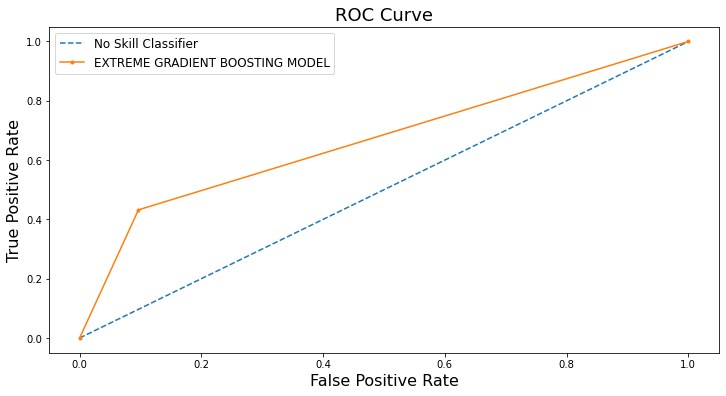

AUC Score: 0.487


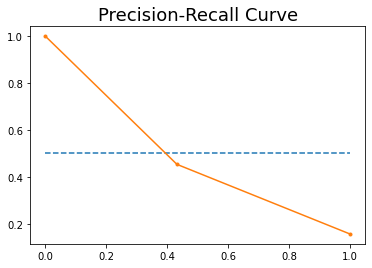

In [69]:
print("GRADIENT BOOSTING Model Performance Metrics:")
print(classification_report(y_test,lgbc_grid_predictions))

print("CONFUSION MATRIX :")
print(confusion_matrix(y_test,lgbc_grid_predictions))
print("\n")

plt.figure(figsize=(12,6))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier') # Let's define a no skill (Dummy) Classifier for reference.

fpr, tpr, _ = roc_curve(y_test,lgbc_grid_predictions)             # passing the target labels & Model Predictions to the roc_curve method. 

plt.plot(fpr, tpr, marker='.', label='EXTREME GRADIENT BOOSTING MODEL')  # Plotting the obtained results.

ns_probs = [0 for _ in range(len(y_test))]       # generating predictions from the no skill (Dummy) classifier for reference.

# Calculating Area under Curve for the No Skill & the trained Model.
ns_auc = roc_auc_score(y_test, ns_probs)
          
lgbc_auc = roc_auc_score(y_test, lgbc_grid_predictions)

print('NO SKILL CLASSIFIER: ROC AUC=%.3f' % (ns_auc))
print('GRADIENT BOOSTING MODEL: ROC AUC=%.3f' % (lgbc_auc))

plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title("ROC Curve",fontsize=18)
plt.legend(prop={'size':12})
plt.show()


# Let's plot the Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, lgbc_grid_predictions)
lgbc_auc_score = auc(recall, precision)

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.title('Precision-Recall Curve',fontsize=18)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
print('AUC Score: %.3f' % lgbc_auc_score)
plt.show()

In [70]:
# Model Names
Model_Names=['LOGISTIC REGRESSION', 'RIDGE CLASSIFIER', 'LINEAR SVM CLASSIFIER', 'DECISION TREE CLASSIFIER', 'BAGGING CLASSIFIER',
            'RANDOM FOREST CLASSIFIER', 'LIGHT GBM']

# DataFrame Index values
Index=['Accuracy (%)','Precision (%)','Recall (%)','F1 Score (%)', 'ROC AUC Score', 'P-R AUC Score']

# Model Prediction values
Model_Predictions=[lr_grid_predictions,rc_grid_predictions,svm_grid_predictions,dtc_grid_predictions,bc_grid_predictions,
                   rfc_grid_predictions,lgbc_grid_predictions]

ROC_scores=[lr_auc,rc_auc,svm_auc,dtc_auc,bc_auc,rfc_auc,lgbc_auc]

PR_scores=[lr_auc_score,rc_auc_score,svm_auc_score,dtc_auc_score,bc_auc_score,rfc_auc_score,lgbc_auc_score]

# Model Metrics methods
model_metrics=[accuracy_score,precision_score,recall_score,f1_score]

# DataFrame Initialisation
Model_Metrics_Comparison=pd.DataFrame(columns=Model_Names,index=Index)

# Let's fill the dataframe with the model metrics values of all the trained models above.
for index,metric in zip(range(0,4),model_metrics):
    for model_name,model_prediction in zip(Model_Names,Model_Predictions):
        Model_Metrics_Comparison[model_name].values[index]=metric(y_test,model_prediction)*100
        
for model_name, rfc_score,pr_score in zip(Model_Names,ROC_scores,PR_scores):
        Model_Metrics_Comparison[model_name].values[4]=rfc_score
        Model_Metrics_Comparison[model_name].values[5]=pr_score

# Metric values in Percentage (%).
Model_Metrics_Comparison

,LOGISTIC REGRESSION,RIDGE CLASSIFIER,LINEAR SVM CLASSIFIER,DECISION TREE CLASSIFIER,BAGGING CLASSIFIER,RANDOM FOREST CLASSIFIER,LIGHT GBM
Accuracy (%),83.137912,84.198772,82.579564,80.122836,84.924623,85.538805,82.970408
Precision (%),46.583851,49.491525,45.209581,39.893617,51.893939,54.022989,45.318352
Recall (%),53.571429,52.142857,53.928571,53.571429,48.928571,50.357143,43.214286
F1 Score (%),49.833887,50.782609,49.185668,45.731707,50.367647,52.125693,44.241316
ROC AUC Score,0.710941,0.711409,0.709087,0.693072,0.702618,0.712077,0.667759
P-R AUC Score,0.537069,0.545581,0.531704,0.503618,0.544034,0.560706,0.487052


* Best model from the above in terms of accuracy is random Forest followed by bagging & Ridge Classifier.

* Based on Precision & recall (which I tried so much to improve but couldn't :( So someone please help), Random forest is some what   better than the rest followed by Ridge & Bagging Classifier.

* Based on the ROC AUC Scores, again Random forest, Ridge or Logistic Regression could be considered.

* But when dealing with an Imbalanced Dataset such as this, we should actually consider the precision-recall scores which accurately         incicate False +ve & False -ve values predicted by the models. 

* Based on the Precision-Recall AUC Scores, Random forest is the best model followed by Ridgr & bagging classifier.

**If you like my Kernel, Please Upvote. Please feel free to provide suggestions in the comments which helps me to improve myself. Thank you :)**